# Intro code

In [42]:
!pip install -q interpret
!pip install -U kaleido
!pip install shap
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libs and data preparing

In [43]:
import os
import pandas as pd

In [44]:
maths = pd.read_csv('Maths.csv')
port = pd.read_csv('Portuguese.csv')

In [45]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [46]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [47]:
maths['isMath'] = 1
port['isMath'] = 0


In [48]:
df = pd.concat([maths, port], ignore_index=True)

In [49]:
df['isMath'].value_counts()

0    649
1    395
Name: isMath, dtype: int64

In [50]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,isMath
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [51]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'isMath'],
      dtype='object')

In [52]:
import numpy as np
df.drop(['G1', 'G2'], inplace=True, axis=1)
df = pd.get_dummies(df, drop_first=True)
random_permutation = np.random.permutation(df.index)
X_train = df.loc[random_permutation[:int(len(df)*0.8)]]
X_test = df.loc[random_permutation[int(len(df)*0.8):]]

y_train = X_train[['G3']]
y_test = X_test[['G3']]

X_train = X_train.drop(['G3'], axis=1)
X_test = X_test.drop(['G3'], axis=1)

In [53]:
len(X_train.columns)

40

## Data Overview

### Features

In [54]:
# Histograms
import plotly.express as px

In [55]:
fig = px.histogram(df, x="G3", color="isMath", marginal="box", hover_data=df.columns)
fig.write_image('distribution.png')
fig.show(renderer="colab")

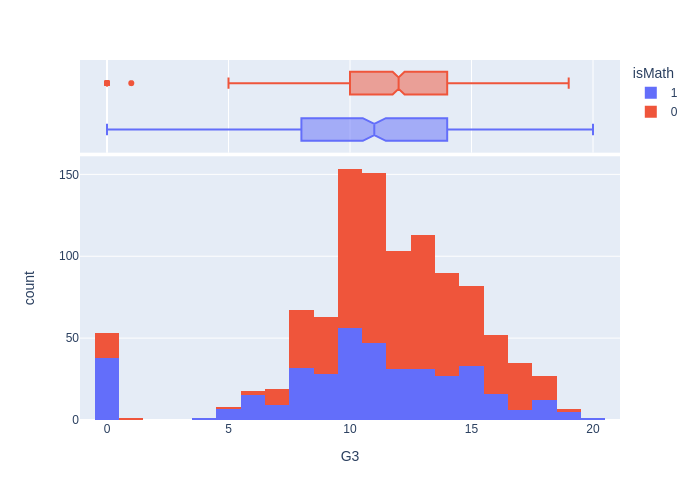

Firstly we made plots of the distributions over our target variable. We see that we have kind of class imbalance in this dataset since there is lack of 1-4 and 19+ classes. Also number of 5,6,7 is very small. This can indicate future problems with classification. For now, we don't transform our target variable, however in future it would be needed to dig deeper into drivers of grades so that better feature engineering might be constructed.

In [56]:
df_tmp = df[['famsize_LE3', 'studytime', 'freetime', 'health', 'G3', 'isMath']]
df_tmp['G3_LE10'] = df['G3'] <= 10
df_tmp.drop(['G3'], inplace=True, axis=1)
fig = px.parallel_categories(df_tmp, color="isMath", color_continuous_scale=px.colors.sequential.Inferno)
fig.write_image('parallel.png')
fig.show()

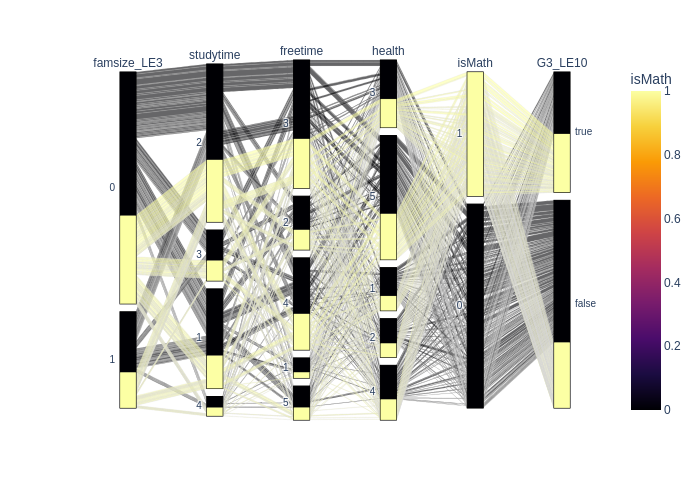

Here we see interesting plot of parallel categories. Firstly we split our target variable into 2 sets, those with values less/equal than 10 and those with higher. From that perspective we could conclude that there is imbalance of G3 across classes.

## Train Models

In [57]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

random_state = 42
ebm_search = [{'learning_rate': 0.1}]
lr_search = [{}]
xgb_search = [{}]

ebm_best = None
lr_best = None
xgb_best = None

ebm_best_score = 0
lr_best_score = 0
xgb_best_score = 0

param_search = {'EBM': ebm_search, 'RF': lr_search, 'XGB': xgb_search}
models = {'EBM': ExplainableBoostingClassifier, 'RF': LogisticRegression, 'XGB': XGBClassifier}
best_ckpts = {'EBM': ebm_best, 'RF': lr_best, 'XGB': xgb_best}
best_scores = {'EBM': ebm_best_score, 'RF': lr_best_score, 'XGB': xgb_best_score}

In [58]:
fn = lambda val: float(val)

In [59]:
y_train.value_counts()

G3
11    128
10    116
12     86
13     85
15     71
14     61
8      53
9      48
0      47
16     39
17     32
18     25
6      14
7      13
5       7
19      7
1       1
4       1
20      1
dtype: int64

## Selecting best model

In [60]:
for model_name in param_search.keys():
  print('Model name', model_name)  
  for params in param_search[model_name]:
    model = models[model_name](random_state=random_state, **params)
    if model_name == 'EBM':
      model.fit(X_train, y_train)
    else:
      model.fit(X_train, y_train.apply(float, axis=1))
    score = model.score(X_test, y_test)
    if score > best_scores[model_name] or best_ckpts[model_name] is None:
        best_ckpts[model_name] = model
        best_scores[model_name] = score

Model name EBM


/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:568: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.

/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:568: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.



Model name RF
Model name XGB


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
results = pd.DataFrame({'Model': ['EBM', 'RF', 'XGB'], 'Score': [best_scores['EBM'], best_scores['RF'], best_scores['XGB']]})
results

,Model,Score
0,EBM,0.138756
1,RF,0.143541
2,XGB,0.138756


Final results looks like follow.

EBM reference: https://interpret.ml/docs/ebm.html

# Homework 5


In [69]:
model = best_ckpts['XGB']
import dalex as dx
explainer = dx.Explainer(model, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 209 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 209 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f7eccca1e60> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000387, mean = 0.0014, max = 0.0362
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0192, mean = 11.4, max = 18.0
  -> model_info        : package xgboost

A new explainer has been created!


In [70]:
pvi = explainer.model_parts(random_state=0)
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## Variable importance for XGB

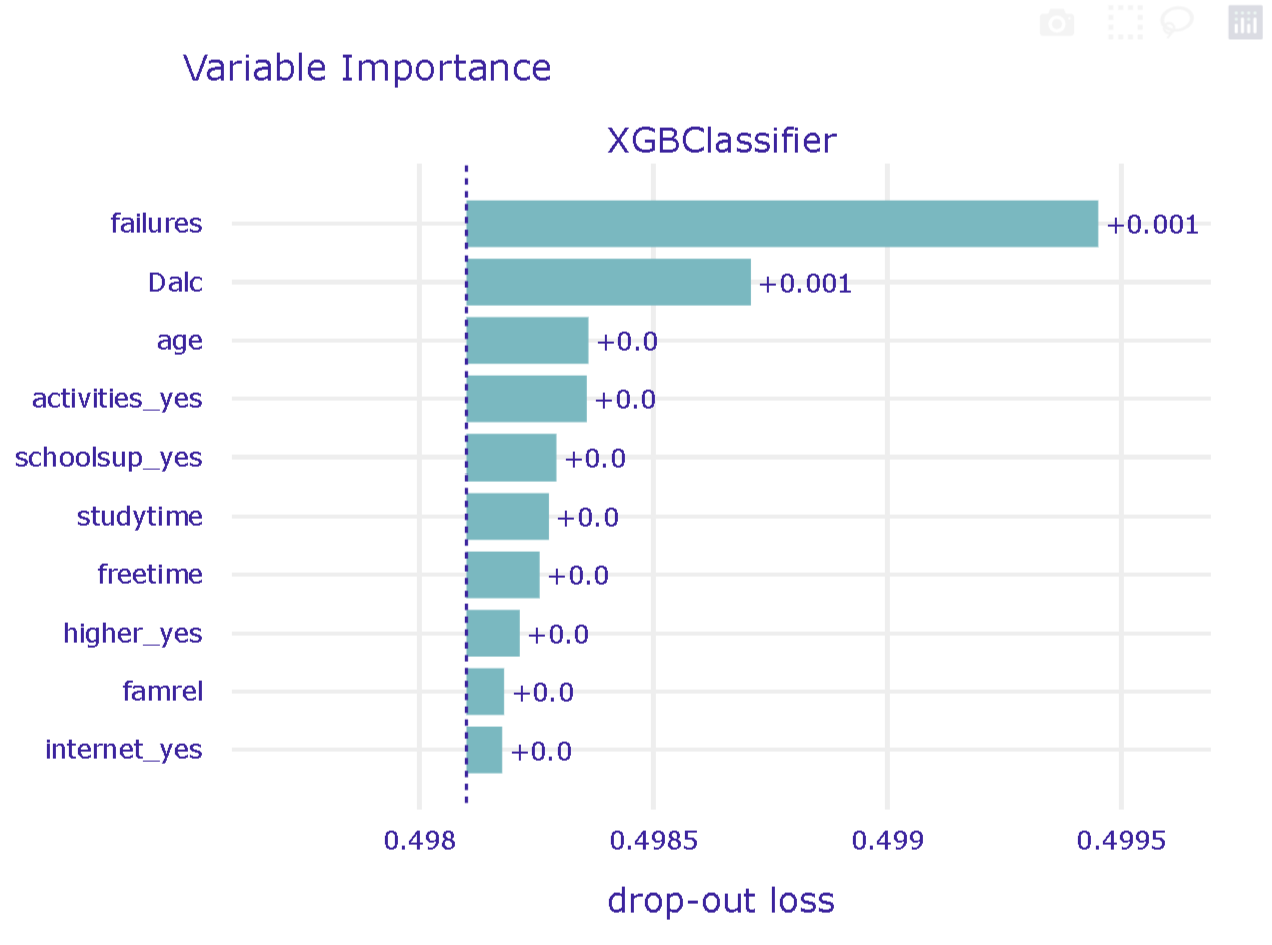

### Here we see some order of features. Level of magnitude of those contributions is very interesting since numbers are very close to 0.

In [71]:
pvi.plot(
    max_vars=3, 
    digits=4, 
    bar_width=40, 
    title="Permutation-based Variable Importance (Top 3)", 
    show=False
).update_layout(width=600)

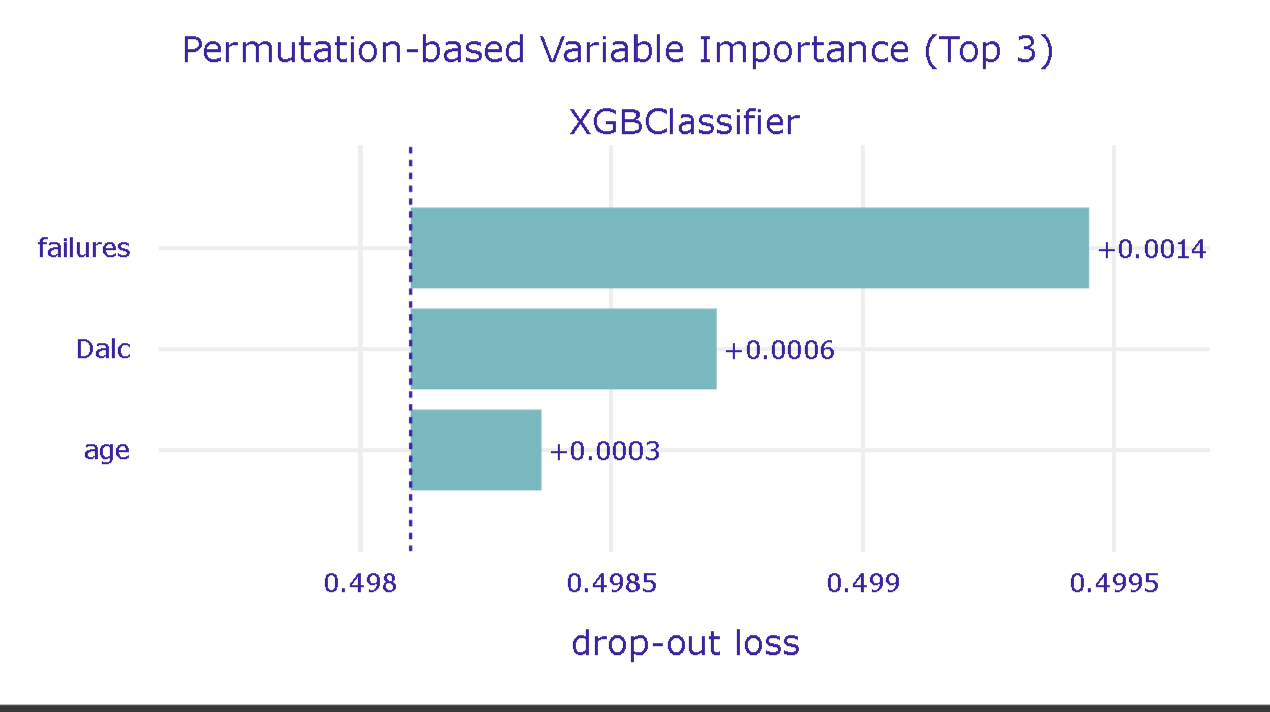

### We see there than on our final target, biggest influence have following values: failures, Dalc and age. Choice of the feature is quite reasonable. For instance, failures and age have quite straight forward indication on firstly characteristic of student, while secondly is related to different stages of life.

## Other models

In [75]:
model = best_ckpts['EBM']
explainer = dx.Explainer(model, X_test, y_test)
pvi = explainer.model_parts(random_state=0)
pvi.plot(
    max_vars=3, 
    digits=4, 
    bar_width=40, 
    title="Permutation-based Variable Importance (Top 3)", 
    show=False
).update_layout(width=600)

Preparation of a new explainer is initiated

  -> data              : 209 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 209 values
  -> model_class       : interpret.glassbox.ebm.ebm.ExplainableBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f7eccca1e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.06e-06, mean = 0.000182, max = 0.00331
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.000773, mean = 11.4, max = 18.0
  -> model_info        : package interpret

A new explainer has been created!


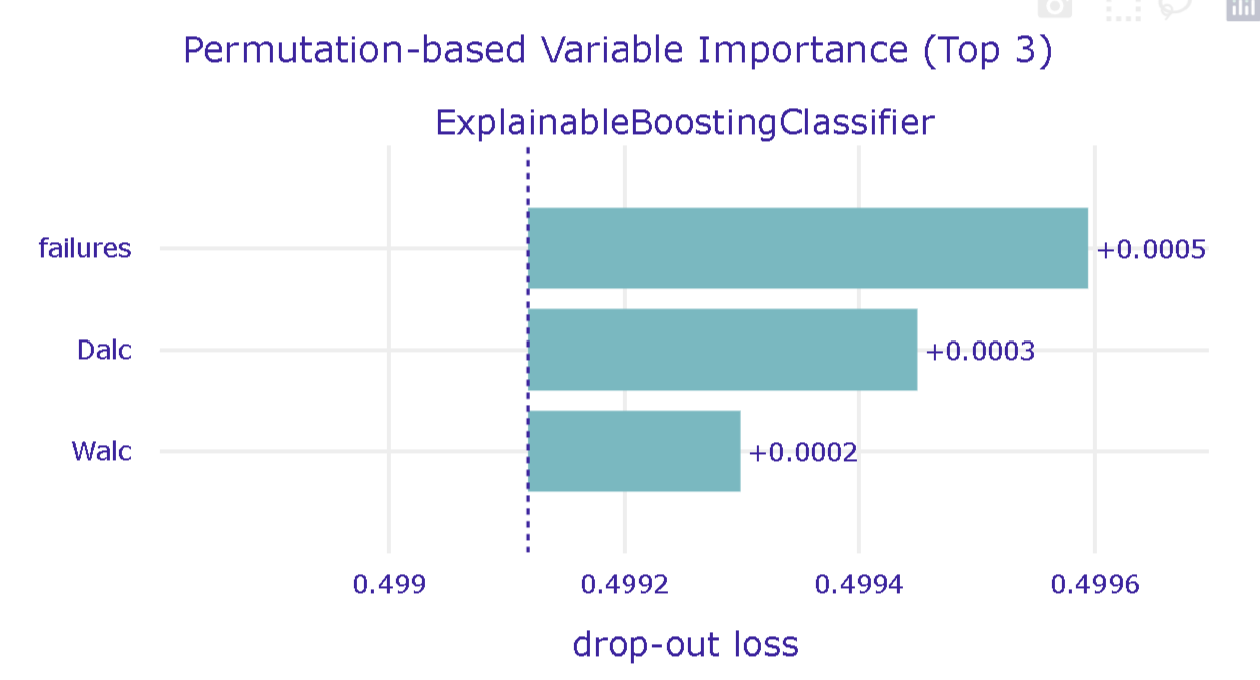

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
explainer = dx.Explainer(model, X_test, y_test)
pvi = explainer.model_parts(random_state=0)
pvi.plot(
    max_vars=3, 
    digits=4, 
    bar_width=40, 
    title="Permutation-based Variable Importance (Top 3)", 
    show=False
).update_layout(width=600)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Preparation of a new explainer is initiated

  -> data              : 209 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 209 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f7eccca1e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.000766, max = 0.03
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 11.4, max = 18.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



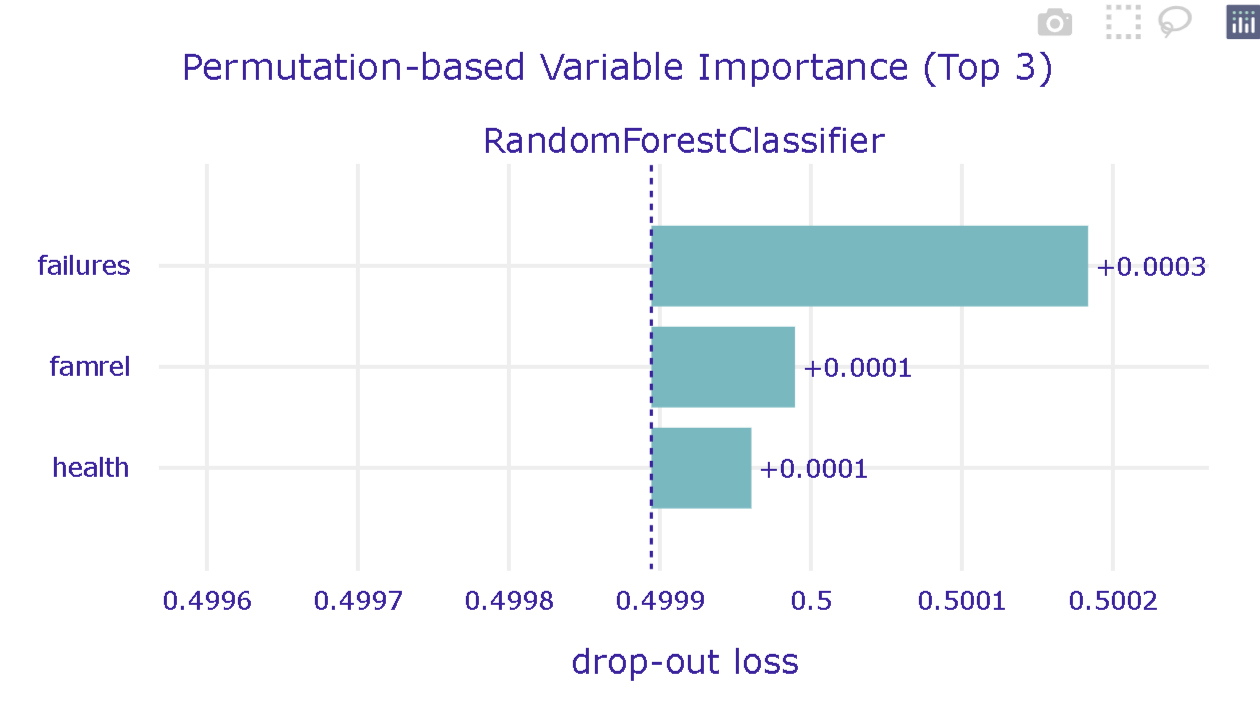

### We see that both for Explainable Boosting machines and for random forest classifiers results are a little similar. Firsly, order of magnitude in all examined examples is equal. Secondly, in all cases failuers seems to be most important factor. However there is a little change on second and third position, however due to very small numbers, it is quite possible that those values, namely for second and third place, are not reliable.

## Feature importance of EBM

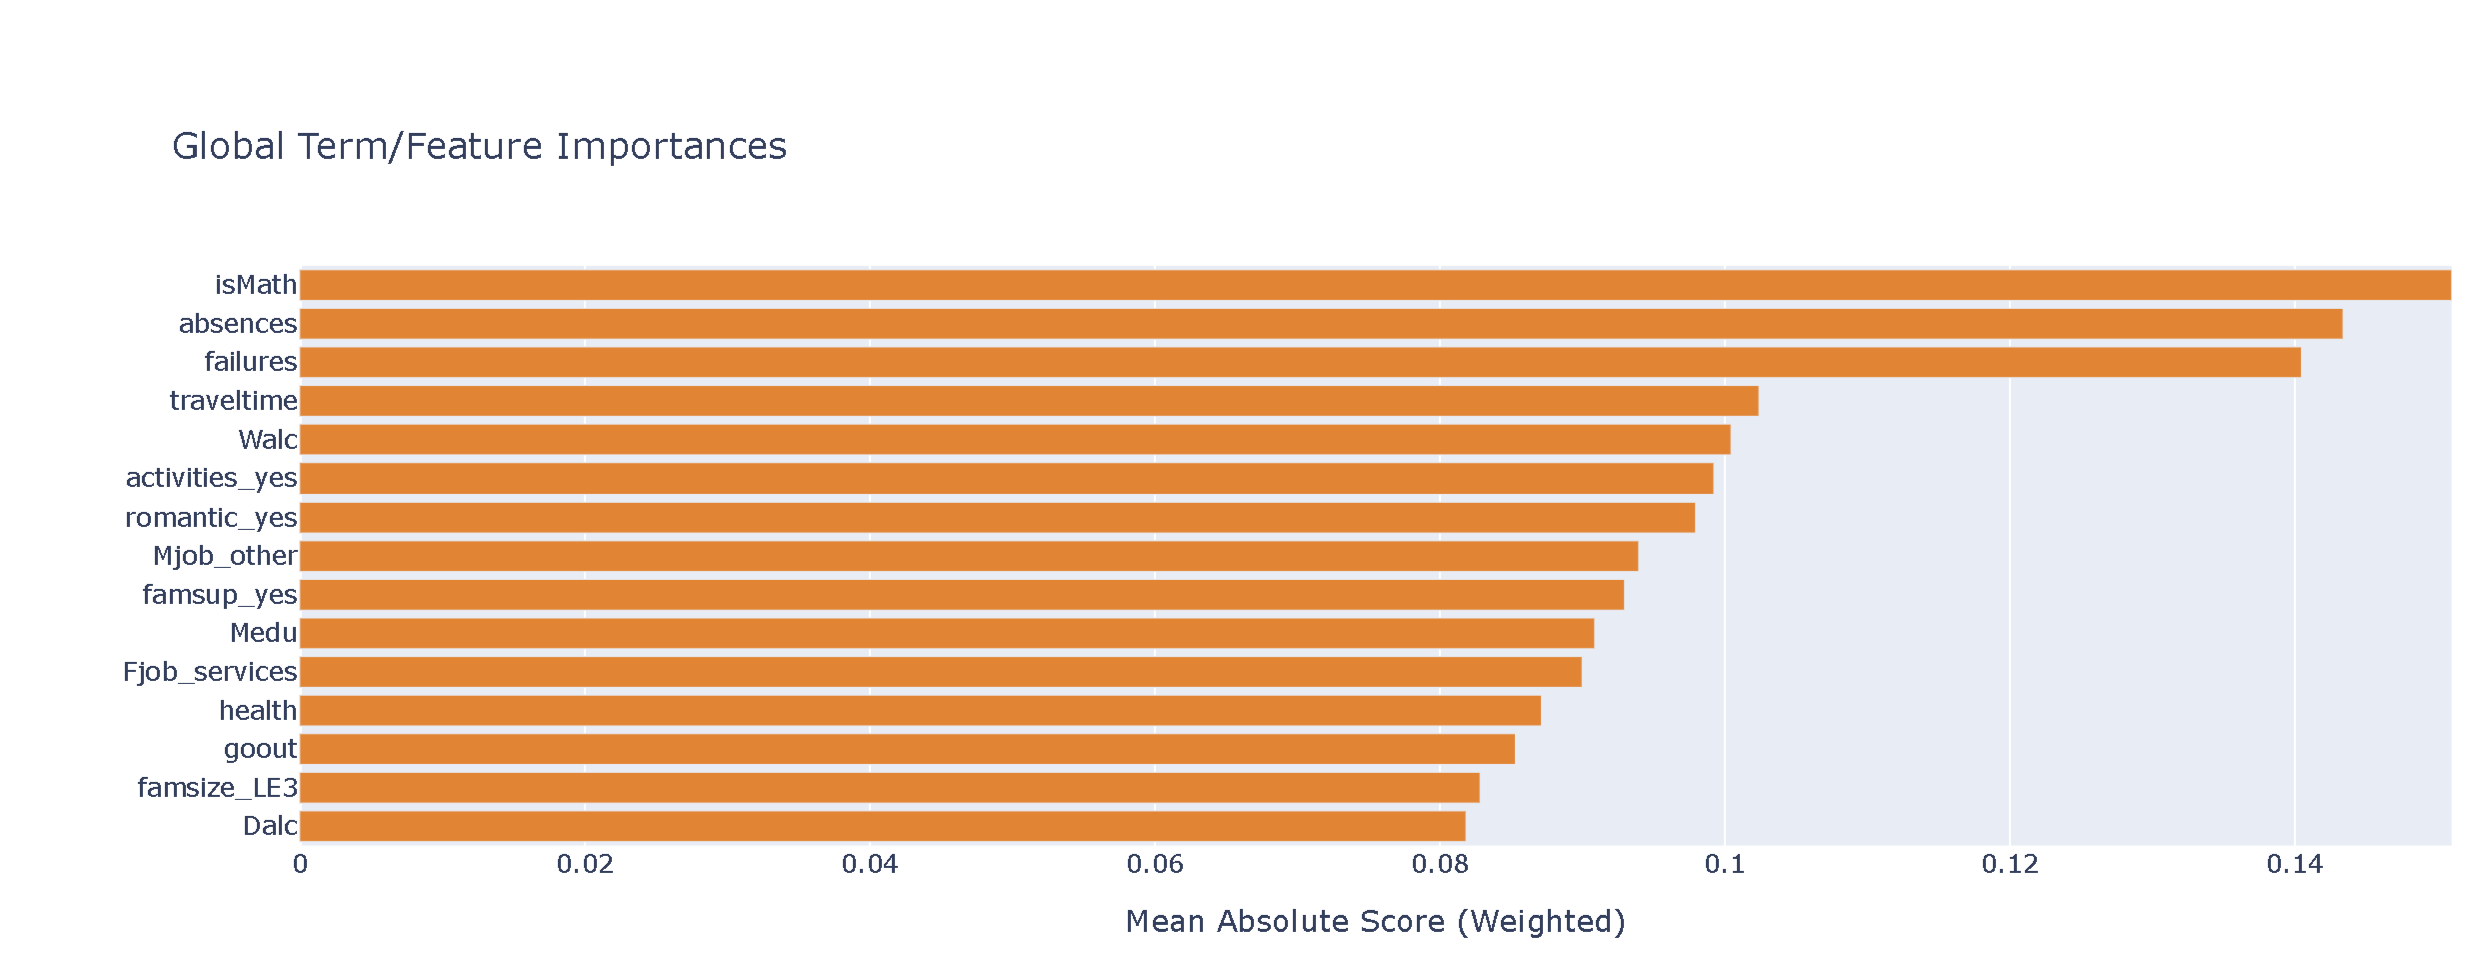

### The term importances are the mean absolute contribution (score) each term (feature or interaction) makes to predictions averaged across the training dataset. Contributions are weighted by the number of samples in each bin, and by the sample weights (if any). The 15 most important terms are shown

### Feature importance for EBMs is calculated as a mean contribution for datapoints across the whole training dataset. Importance is calculated after training procedure and extracted from local plot explanations.

### We see there that failures is still important variable, however according to EBMs philosophy isMath and absences are more important.

In [84]:
from interpret import show
show(best_ckpts['EBM'].explain_global())

## SHAP variable importance based on the TreeSHAP algorithm available in the shap package.


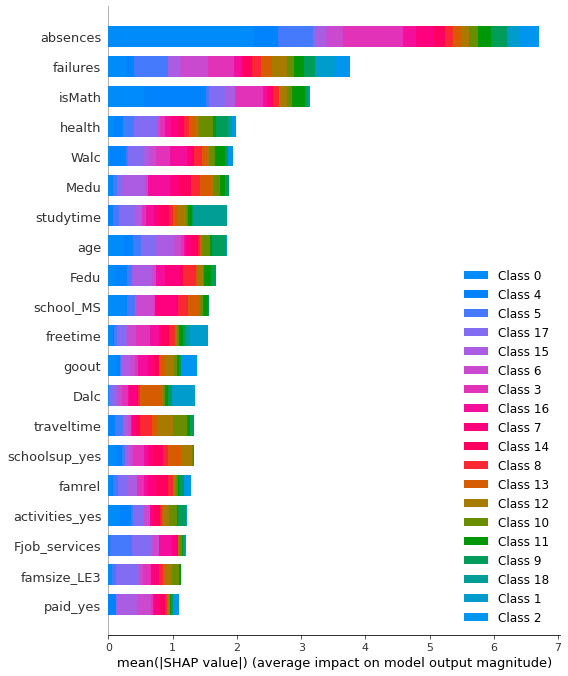

In [89]:
import shap
explainer = shap.TreeExplainer(best_ckpts['XGB'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

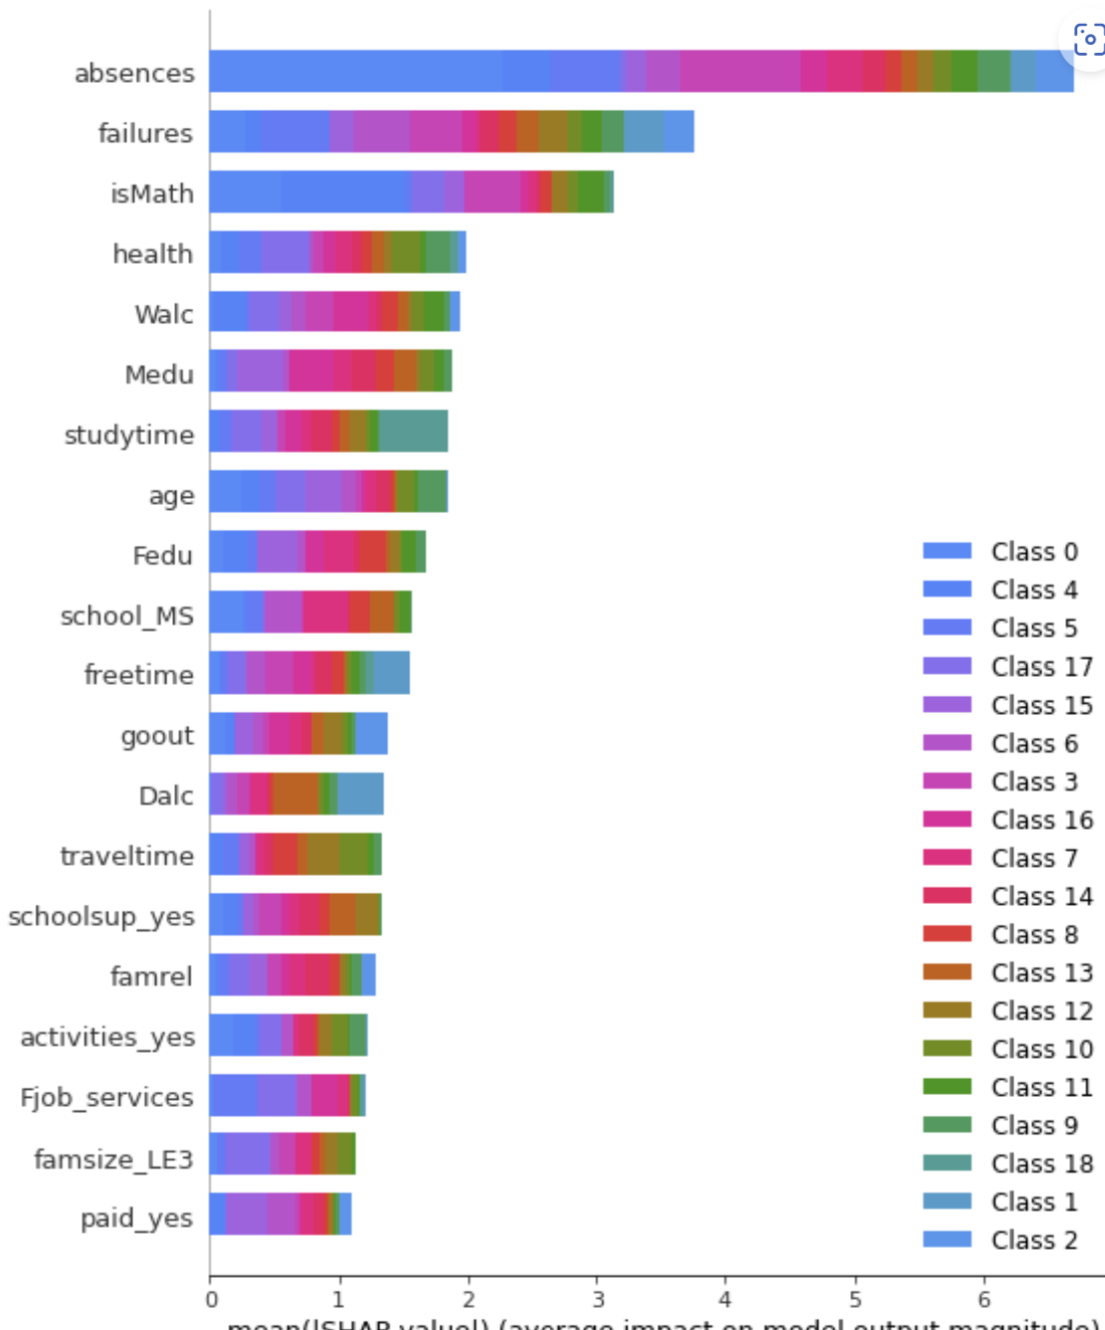

### In this comparison we used a slightly different model. Namely, in shap library there is no support for interactions and for classification problems in ExplainableBoostingMachines there are interactions for most promising tuples. 
### From the plot which shows feature importance wrt shap method, we see that once again failures and absences are important features. Also here we have access to distribution of influences on particular classes.

In [65]:
!jupyter nbconvert --to=html Copy_of_mt406390_xai5.ipynb

[NbConvertApp] WARNING | pattern 'Copy_of_mt406390_xai5.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e